# Podstawy programowania w analizie danych

## Tomasz Rodak

2017/2018, semestr letni

Wykład V

# Dekoratory

## Czym są dekoratory?

* Dekorator to dowolny obiekt wywoływalny, którego zadaniem jest zmodyfikowanie (wzbogacenie funkcjonalności) funkcji lub klasy.
* Dekoratory mogą istnieć dzięki domknięciom!

Dalej omówimy:
* zasady tworzenia bezparametrowych dekoratorów funkcji;
* pewne dekoratory z biblioteki standardowej.

## Zagadka

Definiujemy funkcję

In [1]:
def dekoruj(f):
    def opakowanie(*args, **kwargs):
        print('Nazywam się', f.__name__, ':-)')
        return f(*args, **kwargs)
    return opakowanie

a następnie wykonujemy poniższy kod. Co będzie robić funkcja `kwadrat`?

In [2]:
def kwadrat(x):
    return x ** 2

kwadrat = dekoruj(kwadrat)

In [3]:
kwadrat(8)

Nazywam się kwadrat :-)


64

In [4]:
for k in range(5):
    print('{}**2 == {}'.format(k, kwadrat(k)))

Nazywam się kwadrat :-)
0**2 == 0
Nazywam się kwadrat :-)
1**2 == 1
Nazywam się kwadrat :-)
2**2 == 4
Nazywam się kwadrat :-)
3**2 == 9
Nazywam się kwadrat :-)
4**2 == 16


## Zagadka

Definiujemy funkcję

In [5]:
def licz_wywołania(f):
    licznik = 0
    def opakowanie(*args, **kwargs):
        nonlocal licznik
        licznik += 1
        print('Wywołano mnie już', licznik, 'razy!')
        return f(*args, **kwargs)
    return opakowanie

a następnie wykonujemy poniższy kod. Czym teraz będzie funkcja `kwadrat`?

In [6]:
def kwadrat(x):
    return x ** 2

kwadrat = licz_wywołania(kwadrat)

In [7]:
for k in range(5):
    print('{}**2 == {}'.format(k, kwadrat(k)))

Wywołano mnie już 1 razy!
0**2 == 0
Wywołano mnie już 2 razy!
1**2 == 1
Wywołano mnie już 3 razy!
2**2 == 4
Wywołano mnie już 4 razy!
3**2 == 9
Wywołano mnie już 5 razy!
4**2 == 16


Jak będzie wyglądał ten efekt dla funkcji zdefiniowanej przez rekurencję?

In [8]:
def silnia(n):
    if n == 0:
        return 1
    return n * silnia(n - 1)

silnia = licz_wywołania(silnia)

In [9]:
silnia(7)

Wywołano mnie już 1 razy!
Wywołano mnie już 2 razy!
Wywołano mnie już 3 razy!
Wywołano mnie już 4 razy!
Wywołano mnie już 5 razy!
Wywołano mnie już 6 razy!
Wywołano mnie już 7 razy!
Wywołano mnie już 8 razy!


5040

## Składnia dekoratora

Kody w zaprezentowanych zagadkach można uprościć stosując składnię dekoratora.

Powiedzmy, że chcemy liczyć wywołania funkcji `sześcian()`
```python
def sześcian(x):
    return x ** 3
```

Postępując jak w zagadkach powinniśmy wykonać przypisanie
```python
sześcian = licz_wywołania(sześcian)
```

Zamiast tego wystarczy opatrzyć definicję funkcji `sześcian()` dekoratorem `licz_wywołania`
```python
@licz_wywołania
def sześcian(x):
    return x ** 3
```
Efekt będzie dokładnie ten sam.

In [10]:
@licz_wywołania
def sześcian(x):
    return x ** 3

for k in range(5):
    print('{}**3 == {}'.format(k, sześcian(k)))

Wywołano mnie już 1 razy!
0**3 == 0
Wywołano mnie już 2 razy!
1**3 == 1
Wywołano mnie już 3 razy!
2**3 == 8
Wywołano mnie już 4 razy!
3**3 == 27
Wywołano mnie już 5 razy!
4**3 == 64


## Bardziej formalnie

Składnia
```python
def dekorator(funkcja):
    # kod dekoratora

@dekorator
def jakaś_funkcja(argumenty):
    # kod funkcji
```
jest równoważna z
```python
def dekorator(funkcja):
    # kod dekoratora

def jakaś_funkcja(argumenty):
    # kod funkcji

jakaś_funkcja = dekorator(jakaś_funkcja)

```

* Można powiedzieć, że dekorator w Pythonie jest [**lukrem składniowym**](https://pl.wikipedia.org/wiki/Lukier_sk%C5%82adniowy) (**syntactic sugar**).
* Na razie ograniczyliśmy się do przypadku, gdy funkcja dekorująca
  ```python
  def dekorator(funkcja):
      # kod dekoratora
  ```
  przyjmuje dokładnie jeden parametr -- funkcję, którą będzie dekorować. Nie ma jednak żadnych parametrów konfiguracyjnych.
* Zauważ, że podczas dekorowania
  ```python
  @dekorator
  def jakaś_funkcja(argumenty):
      # kod funkcji
  ```
  funkcja dekorująca podana jest bez nawiasów okrągłych. 
  

## Refaktoryzacja funkcji `licz_wywołania()`.

Funkcja `licz_wywołania()` jest ciekawa sama w sobie, nie może być jednak sprawnie używana, gdyż wypisuje wiele na ekran i to przy każdym wywołaniu dekorowanej funkcji.

Pierwsza poprawka polega po prostu na usunięciu wypisywanego komunikatu.

In [11]:
def licz_wywołania(f):
    licznik = 0
    def opakowanie(*args, **kwargs):
        nonlocal licznik
        licznik += 1
        return f(*args, **kwargs)
    return opakowanie

Testujemy efekt na zadanej rekurencyjnie funkcji `silnia()`.

In [12]:
@licz_wywołania
def silnia(n):
    if n == 0:
        return 1
    return n * silnia(n - 1)

Komunikaty zniknęły, wraz z informacją o liczbie wywołań. 

In [13]:
silnia(10)

3628800

**Jak uzyskać wartość licznika?**

Wartość zmiennej `licznik` znajduje się w domknięciu :-)

Zmienne swobodne funkcji `silnia()`:

In [14]:
silnia.__code__.co_freevars

('f', 'licznik')

Zatem wartość zmiennej `licznik` to

In [15]:
silnia.__closure__[1].cell_contents

11

Uzyskaliśmy więc dostęp do liczby wywołań na drodze niezbyt wygodnej i trudnej do spamiętania introspekcji funkcji.

## Atrybuty funkcji

Atrybuty funkcji przydadzą się nam do dalszej refaktoryzacji `licz_wywołania()`.

Gdy zdefiniujesz jakąś funkcję, powiedzmy o nazwie `funkcja`, to możesz jej przypisać atrybut zgodnie ze składnią
```python
funkcja.nazwa_atrybutu = wartość
```

In [16]:
def fun():
    pass

fun.napis = 'Jestem atrybutem!'
fun.liczba = 9 ** 9

In [17]:
fun.napis, fun.liczba

('Jestem atrybutem!', 387420489)

Atrybuty zdefiniowane przez użytkownika przechowuje atrybut `__dict__` w postaci słownika.

In [18]:
fun.__dict__

{'liczba': 387420489, 'napis': 'Jestem atrybutem!'}

## Dalsza refaktoryzacja `licz_wywołania()`

Przypomnijmy, że teraz nasz dekorator
```python
def licz_wywołania(f):
    licznik = 0
    def opakowanie(*args, **kwargs):
        nonlocal licznik
        licznik += 1
        return f(*args, **kwargs)
    return opakowanie
```
wiąże dekorowaną funkcję z nielokalną zmienną `licznik`.

Pamiętamy, że dostęp do zmiennej `licznik` jest nieco uciążliwy.

Przeróbmy ją zatem na atrybut dekorowanej funkcji! Dekorator utworzy atrybut i zajmie się jego inkrementacją.

Oto dekorator

In [19]:
def licz_wywołania(f):
    def opakowanie(*args, **kwargs):
        opakowanie.liczba_wywołań += 1
        return f(*args, **kwargs)
    opakowanie.liczba_wywołań = 0
    return opakowanie

i jego użycie

In [20]:
@licz_wywołania
def silnia(n):
    if n == 0:
        return 1
    return n * silnia(n - 1)

In [21]:
silnia(10)

3628800

In [22]:
silnia.liczba_wywołań

11

## Ciąg Fibonacciego rekurencyjnie

Zajmiemy się teraz przykładem bardziej złożonym --  liczbą wywołań funkcji zadającej rekurencyjnie ciąg Fibonacciego.

Przypomnijmy definicję:
$$F_0 := 0,\quad F_1 := 1$$
i dla $n\geqslant 2,$
$$F_n := F_{n-2} + F_{n-1}.$$

W wielu językach programowania definicja ta daje się wprost przełożyć na definicję funkcji obliczającej $n$-ty wyraz.

In [23]:
def fib(n):
    if n == 0 or n == 1:
        return n
    return fib(n - 1) + fib(n - 2)

Dekorujemy

In [61]:
@licz_wywołania
def fib(n):
    if n == 0 or n == 1:
        return n
    return fib(n - 1) + fib(n - 2)

i przystępujemy do testowania

In [25]:
fib(1)

1

In [26]:
fib.liczba_wywołań

1

In [27]:
fib.liczba_wywołań = 0
wynik = fib(5)

wynik, fib.liczba_wywołań

(5, 15)

In [28]:
fib.liczba_wywołań = 0
wynik = fib(15)

wynik, fib.liczba_wywołań

(610, 1973)

Skracamy pracę zapisując liczbę wywołań do listy.

In [29]:
eny = range(31)
liczby_wywołań = []

for n in eny:
    fib.liczba_wywołań = 0
    print('fib({}) == {}'.format(n, fib(n)))
    liczby_wywołań.append(fib.liczba_wywołań)

fib(0) == 0
fib(1) == 1
fib(2) == 1
fib(3) == 2
fib(4) == 3
fib(5) == 5
fib(6) == 8
fib(7) == 13
fib(8) == 21
fib(9) == 34
fib(10) == 55
fib(11) == 89
fib(12) == 144
fib(13) == 233
fib(14) == 377
fib(15) == 610
fib(16) == 987
fib(17) == 1597
fib(18) == 2584
fib(19) == 4181
fib(20) == 6765
fib(21) == 10946
fib(22) == 17711
fib(23) == 28657
fib(24) == 46368
fib(25) == 75025
fib(26) == 121393
fib(27) == 196418
fib(28) == 317811
fib(29) == 514229
fib(30) == 832040


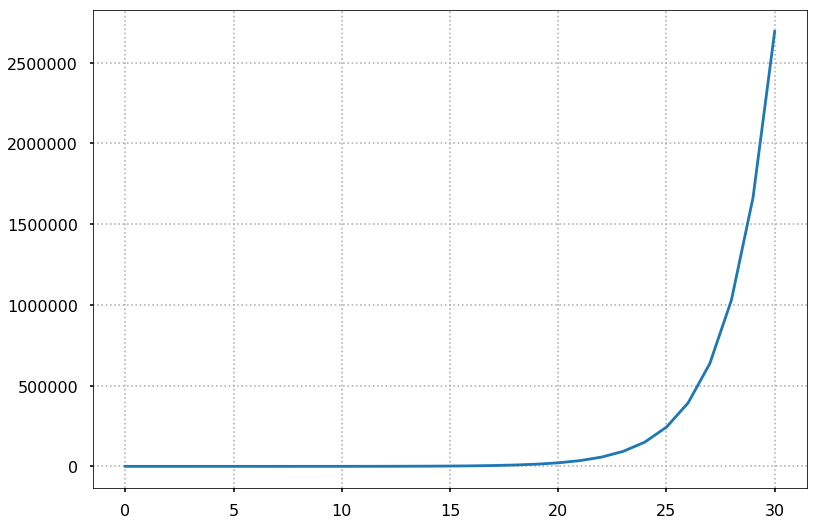

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.close('all')
plt.style.use('seaborn-poster')
fig, ax = plt.subplots()
ax.plot(eny, liczby_wywołań)
ax.grid(ls=':');

Ile czasu potrzebuje nasza funkcja na obliczenie `fib(100)`?

Sprawdźmy najpierw jak zwiększa się liczba wywołań funkcji `fib()`, gdy zmieniamy `n` na  `n + 1`.

In [31]:
for a, b in zip(liczby_wywołań[:-1], liczby_wywołań[1:]):
    print('{:.4f}'.format(b / a), end=', ')

1.0000, 3.0000, 1.6667, 1.8000, 1.6667, 1.6667, 1.6400, 1.6341, 1.6269, 1.6239, 1.6215, 1.6202, 1.6194, 1.6189, 1.6185, 1.6183, 1.6182, 1.6182, 1.6181, 1.6181, 1.6181, 1.6181, 1.6180, 1.6180, 1.6180, 1.6180, 1.6180, 1.6180, 1.6180, 1.6180, 

Widać znakomitą regularność -- `fib(n + 1)` wywołuje funkcję `fib()` około `1.618` raza więcej niż `fib(n)`.

Sprawdźmy, czy czas wykonania skalowany jest tym samym czynnikiem.

In [62]:
%timeit fib(29)

1.07 s ± 940 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
%timeit fib(30)

1.73 s ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Zgodność jest bardzo dobra.

In [64]:
1.618 * 1.07

1.7312600000000002

Podsumowując, `fib(30)` wykonuje się `1.73` sekundy, więc `fib(100)` obliczymy po

In [65]:
sekundy = 1.73 * 1.618**70
sekundy

735431643659484.6

sekundach, czyli po

In [66]:
sekundy / 3600 / 24 / 365

23320384.43872034

latach :-)

## Ratowanie definicji rekurencyjnej

W bezpośredniej implementacji definicji rekurencyjnej ciągu Fibonacciego problemem jest to, że na jednej i tej samej liczbie `k` funkcja `fib()` wywoływana jest wielokrotnie.

Rzowiązaniem jest zapamiętywanie wyników pośrednich.

In [37]:
pamięć = {0: 0, 1: 1}

def fib_z_pamięcią(n):
    if n not in pamięć:
        pamięć[n] = fib_z_pamięcią(n - 2) + fib_z_pamięcią(n - 1)
    return pamięć[n]

Sprawdźmy liczbę wywołań.

In [38]:
pamięć = {0: 0, 1: 1}

@licz_wywołania
def fib_z_pamięcią(n):
    if n not in pamięć:
        pamięć[n] = fib_z_pamięcią(n - 2) + fib_z_pamięcią(n - 1)
    return pamięć[n]

In [39]:
fib_z_pamięcią(200)

280571172992510140037611932413038677189525

In [40]:
fib_z_pamięcią.liczba_wywołań

399

## Dekorator zapamiętujący

Podany wyżej chwyt z pamięcią można przełożyć na dekorator zapamiętujący stosowalny do funkcji jednej zmiennej.

In [41]:
def zapamiętuj(f):
    pamięć = {}
    def opakowanie(x):
        if x not in pamięć:
            pamięć[x] = f(x)
        return pamięć[x]
    return opakowanie       

Możemy go zastosować do poprzedniej funkcji `fib()`. Dzięki użyciu dekoratora zachowujemy czytelność definicji rekurencyjnej.

In [42]:
@zapamiętuj
def fib(n):
    if n == 0 or n == 1:
        return n
    return fib(n - 2) + fib(n - 1)

In [43]:
fib(100)

354224848179261915075

In [44]:
%timeit -n 2000 fib(100)

176 ns ± 2.59 ns per loop (mean ± std. dev. of 7 runs, 2000 loops each)


Dekoratory możemy spiętrzyć.

In [45]:
@licz_wywołania
@zapamiętuj
def fib(n):
    if n == 0 or n == 1:
        return n
    return fib(n - 2) + fib(n - 1)

In [46]:
fib(200)

280571172992510140037611932413038677189525

In [47]:
fib.liczba_wywołań

399

## Metadane funkcji

Jak dotąd nie pisaliśmy docstringów do funkcji. To źle!

In [48]:
@zapamiętuj
def fib(n):
    '''Zwraca n-ty wyraz ciągu Fibonacciego.'''
    if n == 0 or n == 1:
        return n
    return fib(n - 2) + fib(n - 1)

Sprawdzamy ekran pomocy

In [49]:
help(fib)

Help on function opakowanie in module __main__:

opakowanie(x)



i nazwę funkcji

In [50]:
fib.__name__

'opakowanie'

Niedobrze. Dekorator nie zapamiętał metadanych funkcji.

## `functools.wraps`

Aby dekorator nie gubił metadanych dekorowanej funkcji należy użyć... dekoratora `wraps()` z modułu `functools`.

Poprawiamy `licz_wywołania()`.

In [51]:
from functools import wraps

def licz_wywołania(f):
    @wraps(f)
    def opakowanie(*args, **kwargs):
        opakowanie.liczba_wywołań += 1
        return f(*args, **kwargs)
    opakowanie.liczba_wywołań = 0
    return opakowanie

* `wraps()` dekoruje funkcję `opakowanie()`.
* `wraps()` posiada parametry -- jego argumentem jest funkcja przekazywana do dekorowania (czyli `f`) przez definiowany dekorator (czyli `licz_wywołania()`).

Analogicznie poprawiamy `zapamiętuj()`.

In [52]:
def zapamiętuj(f):
    pamięć = {}
    @wraps(f)
    def opakowanie(x):
        if x not in pamięć:
            pamięć[x] = f(x)
        return pamięć[x]
    return opakowanie       

Teraz nawet piętrowe dekoratory nie zgubią docstringu ani innych metadanych.

In [53]:
@licz_wywołania
@zapamiętuj
def fib(n):
    '''Zwraca n-ty wyraz ciągu Fibonacciego.'''
    if n == 0 or n == 1:
        return n
    return fib(n - 2) + fib(n - 1)

In [54]:
help(fib)

Help on function fib in module __main__:

fib(n)
    Zwraca n-ty wyraz ciągu Fibonacciego.



In [55]:
fib.__name__

'fib'

## `functools.lru_cache`

Dekorator `lru_cache()` z modułu `functools` implementuje memoizację (czyli zapamiętywanie pośrednich wyników) -- niepotrzebnie trudziliśmy się z dekoratorem `zapamiętuj()` :-/

In [56]:
from functools import lru_cache

@lru_cache()
def fib(n):
    '''Zwraca n-ty wyraz ciągu Fibonacciego.'''
    if n == 0 or n == 1:
        return n
    return fib(n - 1) + fib(n - 2)

`lru_cache()` również przyjmuje parametry. Dlatego należy go pisać z nawiasami okrągłymi -- nawet wtedy, gdy żadnych argumentów nie wprowadzamy.

In [57]:
%timeit -n 20000 fib(200)

129 ns ± 6.24 ns per loop (mean ± std. dev. of 7 runs, 20000 loops each)


In [58]:
help(fib)

Help on _lru_cache_wrapper in module __main__:

fib(n)
    Zwraca n-ty wyraz ciągu Fibonacciego.

